<a href="https://colab.research.google.com/github/lorek/MethodsClassDimRed/blob/main/MoCaDR_List_nr_13_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NOTEBOOK NO 13, transfer learning

**NOTE: THIS SCRIPT IS NOT POLISHED**

In [ ]:
import keras
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

import time

In [ ]:
# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 6s 0us/step


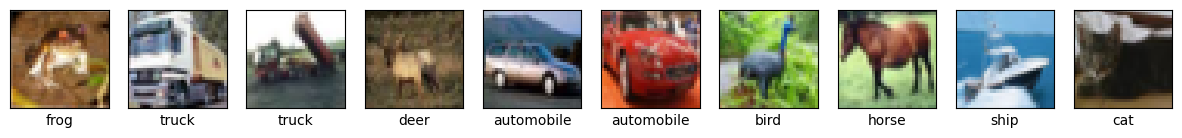

In [ ]:
# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Function to display images with labels
def display_images(images, labels, class_names, num_images=10):
    plt.figure(figsize=(15, 3))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        plt.xlabel(class_names[labels[i][0]])
    plt.show()

# Display images with labels
display_images(x_train, y_train, class_names)

In [ ]:
# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the data for logistic regression
x_train_flattened = x_train.reshape(x_train.shape[0], -1)
x_test_flattened = x_test.reshape(x_test.shape[0], -1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Logistic classifier

In [ ]:
# Define the logistic regression model
logistic_model = Sequential()
logistic_model.add(Dense(10, activation='softmax', input_shape=(x_train_flattened.shape[1],)))

# Compile the model
logistic_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
logistic_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                30730     
                                                                 
Total params: 30730 (120.04 KB)
Trainable params: 30730 (120.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:


# Measure the time taken for model fitting
start_time = time.time()

# Train the model
history_logistic = logistic_model.fit(x_train_flattened, y_train, epochs=10, batch_size=64, validation_data=(x_test_flattened, y_test), verbose=1)

end_time = time.time()
training_time_logistic = end_time - start_time

print(f'Time taken for logistic model fitting: {training_time_logistic:.2f} seconds')


Epoch 1/10
782/782 [==============================] - 5s 4ms/step - loss: 1.9417 - accuracy: 0.3161 - val_loss: 1.8420 - val_accuracy: 0.3592
Epoch 2/10
782/782 [==============================] - 3s 4ms/step - loss: 1.8451 - accuracy: 0.3602 - val_loss: 1.8676 - val_accuracy: 0.3527
Epoch 3/10
782/782 [==============================] - 2s 3ms/step - loss: 1.8161 - accuracy: 0.3694 - val_loss: 1.8254 - val_accuracy: 0.3670
Epoch 4/10
782/782 [==============================] - 2s 3ms/step - loss: 1.8048 - accuracy: 0.3723 - val_loss: 1.8925 - val_accuracy: 0.3425
Epoch 5/10
782/782 [==============================] - 2s 3ms/step - loss: 1.7930 - accuracy: 0.3814 - val_loss: 1.8338 - val_accuracy: 0.3542
Epoch 6/10
782/782 [==============================] - 3s 4ms/step - loss: 1.7921 - accuracy: 0.3813 - val_loss: 1.8210 - val_accuracy: 0.3636
Epoch 7/10
782/782 [==============================] - 3s 4ms/step - loss: 1.7737 - accuracy: 0.3886 - val_loss: 1.7716 - val_accuracy: 0.3822
Epoch 

In [ ]:

# Evaluate the model on the test set
logistic_test_loss, logistic_test_accuracy = logistic_model.evaluate(x_test_flattened, y_test)
print(f'Logistic Classifier: Test loss: {logistic_test_loss:.4f}, Test accuracy: {logistic_test_accuracy:.4f}')

313/313 [==============================] - 1s 2ms/step - loss: 1.8743 - accuracy: 0.3607
Logistic Classifier: Test loss: 1.8743, Test accuracy: 0.3607


# MLP

In [ ]:
# Define the MLP model
mlp_model = Sequential()
mlp_model.add(Dense(256, activation='relu', input_shape=(x_train_flattened.shape[1],)))
mlp_model.add(Dense(256, activation='relu'))
mlp_model.add(Dense(10, activation='softmax'))

# Compile the model
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Measure the time taken for model fitting
start_time = time.time()

# Train the model
history_mlp = mlp_model.fit(x_train_flattened, y_train, epochs=10, batch_size=64, validation_data=(x_test_flattened, y_test), verbose=1)

end_time = time.time()
training_time_mlp = end_time - start_time

print(f'Time taken for MLP model fitting: {training_time_mlp:.2f} seconds')



Epoch 1/10
782/782 [==============================] - 5s 4ms/step - loss: 1.8526 - accuracy: 0.3296 - val_loss: 1.6940 - val_accuracy: 0.3867
Epoch 2/10
782/782 [==============================] - 3s 4ms/step - loss: 1.6680 - accuracy: 0.4018 - val_loss: 1.6037 - val_accuracy: 0.4324
Epoch 3/10
782/782 [==============================] - 3s 4ms/step - loss: 1.5905 - accuracy: 0.4324 - val_loss: 1.5962 - val_accuracy: 0.4271
Epoch 4/10
782/782 [==============================] - 3s 4ms/step - loss: 1.5358 - accuracy: 0.4523 - val_loss: 1.5936 - val_accuracy: 0.4246
Epoch 5/10
782/782 [==============================] - 3s 4ms/step - loss: 1.5006 - accuracy: 0.4633 - val_loss: 1.4953 - val_accuracy: 0.4668
Epoch 6/10
782/782 [==============================] - 3s 4ms/step - loss: 1.4711 - accuracy: 0.4761 - val_loss: 1.4743 - val_accuracy: 0.4711
Epoch 7/10
782/782 [==============================] - 3s 4ms/step - loss: 1.4495 - accuracy: 0.4823 - val_loss: 1.5038 - val_accuracy: 0.4572
Epoch 

In [ ]:
# Evaluate the model on the test set
mlp_test_loss, mlp_test_accuracy = mlp_model.evaluate(x_test_flattened, y_test)
print(f'MLP: Test loss: {mlp_test_loss:.4f}, Test accuracy: {mlp_test_accuracy:.4f}')

313/313 [==============================] - 1s 2ms/step - loss: 1.4842 - accuracy: 0.4737
MLP: Test loss: 1.4842, Test accuracy: 0.4737


# TRANSFER LEARNING
## Load relatively large VGG16 which was trained on  `ImageNet`

**ImageNet Dataset**
* ImageNet is a large visual database designed for use in visual object recognition software research.
* It contains over 14 million images across more than 20,000 categories.
*The VGG16 model, along with other popular architectures like ResNet, Inception, and AlexNet, were originally trained on the ImageNet dataset to classify images into 1,000 different categories, such as animals, vehicles, household objects, etc.

**VGG16 Model**
* **VGG16** is a deep convolutional neural network architecture proposed by the Visual Geometry Group (VGG) at the University of Oxford.
* It consists of 16 layers (13 convolutional layers, 3 fully connected layers) with a consistent use of 3x3 convolutional filters and 2x2 pooling layers.
* VGG16 was designed to classify images into 1,000 categories as part of the ImageNet Large Scale Visual Recognition Challenge (ILSVRC).

Model **with** top layers (just to see architecture)

In [ ]:

# Load VGG16 with top layers
base_model_with = VGG16(weights='imagenet', include_top=True)


553467096/553467096 [==============================] - 13s 0us/step


In [ ]:
base_model_with.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Model **WITHOUT** top layers

In [ ]:
# Load VGG16 without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

**FREEZE** these layers -- we do not want to train them

In [ ]:

# Freeze the base model
for layer in base_model.layers:
    print("layer = ", layer)
    layer.trainable = False

layer =  <keras.src.engine.input_layer.InputLayer object at 0x7f44dfe24e20>
layer =  <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f44dfe24fa0>
layer =  <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f44ebc1ffa0>
layer =  <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f44e1f1a500>
layer =  <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f44e1f19ff0>
layer =  <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f447018fd00>
layer =  <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f44e425e4a0>
layer =  <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f44e3cec4c0>
layer =  <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f447018f5e0>
layer =  <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f447018dff0>
layer =  <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f447018c640>
layer =  <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f44687e34c0>
layer =  <ke

In [ ]:
# Create a new model with the base and custom layers
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense_20 (Dense)            (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_21 (Dense)            (None, 10)                2570      
                                                                 
Total params: 14848586 (56.64 MB)
Trainable params: 133898 (523.04 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
start_time = time.time()


# Train the model without data augmentation
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test), verbose=1)

end_time = time.time()
training_time = end_time - start_time

print(f'Time taken for model fitting: {training_time:.2f} seconds')

Epoch 1/10
782/782 [==============================] - 17s 16ms/step - loss: 1.5170 - accuracy: 0.4692 - val_loss: 1.2893 - val_accuracy: 0.5524
Epoch 2/10
782/782 [==============================] - 11s 14ms/step - loss: 1.2997 - accuracy: 0.5449 - val_loss: 1.2226 - val_accuracy: 0.5730
Epoch 3/10
782/782 [==============================] - 11s 14ms/step - loss: 1.2457 - accuracy: 0.5646 - val_loss: 1.1864 - val_accuracy: 0.5832
Epoch 4/10
782/782 [==============================] - 10s 13ms/step - loss: 1.2075 - accuracy: 0.5771 - val_loss: 1.1719 - val_accuracy: 0.5854
Epoch 5/10
782/782 [==============================] - 11s 14ms/step - loss: 1.1813 - accuracy: 0.5864 - val_loss: 1.1513 - val_accuracy: 0.5956
Epoch 6/10
782/782 [==============================] - 11s 14ms/step - loss: 1.1571 - accuracy: 0.5955 - val_loss: 1.1375 - val_accuracy: 0.6021
Epoch 7/10
782/782 [==============================] - 10s 13ms/step - loss: 1.1434 - accuracy: 0.6013 - val_loss: 1.1343 - val_accuracy:

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

313/313 [==============================] - 3s 8ms/step - loss: 1.1089 - accuracy: 0.6098
Test accuracy: 0.6098


Ranking of algorithms/networks for CIFAR-10:

https://paperswithcode.com/sota/image-classification-on-cifar-10

#Q13.1 **TO DO**